# 의사 결정 나무(decision tree)
- 의사 결정 나무(decision tree: 결정 트리) 는 일련의 질문에 대한 결정을 통해 데이터를 분해하는 모델로 생각할 수 있다 
- 결정 트리는 훈련 데이터에 있는 특성을 기반으로 샘플의 클래스 레이블을 추청할 수 있는 이련의 질문을 학습한다. 
- 결정 알고리즘을 사용하면 트리의 루트(root)에서 시작에서 정보 이득(information gain, IG)이 최대가 되는 특성으로 데이터를 나눈다. 반복 과정을 통해 리프 노드(leaf node)가 순수해질 때까지 모든 자식 노드에서 분할 작업을 반복한다. 즉, 각 노드의 모든 훈련 샘플은 동일한 클래스에 속한다. 실제로 이렇게 하면 노드가 많은 깊은 트리가 만들어지고 과대적바될 가능성이 높다. 일반적으로 트리의 최대 깊이를 제한하여 트리를 가지치기(pruning) 한다
- 결정 트리에 널리 사용되는 세개의 불순도 지표 또는 분할 조건은 지니 불순도(Gini impurity, Ig), 엔트로피(entropy, Ih), 분류오차(classification error, Ie)이다. 

### 불순도 지표 비교 (지니 불순도(Gini impurity), 엔트로피(entropy), 분류오차(classification error))

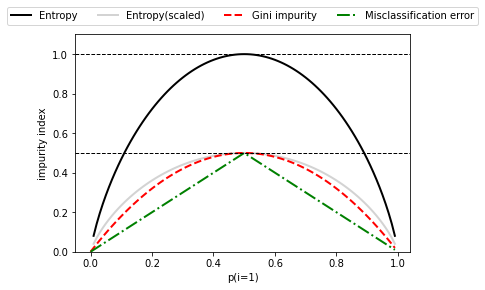

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 지니 불순도
def gini(p):
    return (p) * (1-(p)) + (1- p)* (1-(1-p))

# 엔트로피
def entropy(p):
    return - p *np.log2(p) - (1-p)*np.log2((1-p))

# 분류 오차
def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls ,c in zip([ent, sc_ent, gini(x), err],
                        ['Entropy', 'Entropy(scaled)', 'Gini impurity', 'Misclassification error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green', 'cyan']
                        ):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc ='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y = 0.5, linewidth = 1, color = 'k', linestyle='--')
ax.axhline(y = 1.0, linewidth = 1, color = 'k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

### 의사 결정 나무 알고리즘 

In [2]:
# 데이터 불러오기
from sklearn import datasets
raw_wine = datasets.load_wine()

In [3]:
# 피쳐, 타겟 데이터 지정
X = raw_wine.data
y = raw_wine.target

In [4]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [5]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [6]:
# 의사결정나무 학습
from sklearn import tree 
clf_tree = tree.DecisionTreeClassifier(random_state=0)
clf_tree.fit(X_tn_std, y_tn)

DecisionTreeClassifier(random_state=0)

- 의사 결정 나무를 사용하기 위해서는 tree라는 함수를 사용하며, 실습에서 사용하는 분류 문제를 푸는 것이 목적이므로 DecisionTreeClassifier 메서도를 사용하였다.
- 만일 회귀 문제를 사용한다면 from sklearn.tree import DecisionTreeRegressor를 사용한다 

In [7]:
# 데이터 예측
pred_tree = clf_tree.predict(X_te_std)
print(pred_tree)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 1 0 1 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 1 0 1 1 1]


In [8]:
# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_tree, average='macro')
print(f1)

0.9349141206870346


In [9]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_tree)
print(conf_matrix)

[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


In [10]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_tree)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.91      0.95      0.93        21
           2       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45

